<a href="https://colab.research.google.com/github/Naiya711/naiya711/blob/main/ENews_Express_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following

**questions:**

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?

**Data Dictionary**


The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
#importing different libraries to perform the statistical analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [ ]:
# Connecting google colab with drive to access csv file stored in drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Assigning path to access csv file from google drive
path = '/content/drive/My Drive/abtest.csv'
df = pd.read_csv(path)

## Reading the Data into a DataFrame

In [ ]:
# Viewing first five rows of data to read it
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# Viewing last five rows of data
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Getting to know the number of rows and columns in data
df.shape

(100, 6)

In [ ]:
# Accessing data types of all columns in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
# Accessing the description of whole data
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [ ]:
# checking for any null values in data
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [ ]:
# checking for any duplicates in data
df.duplicated().sum()

0

### Univariate Analysis

**Group:**

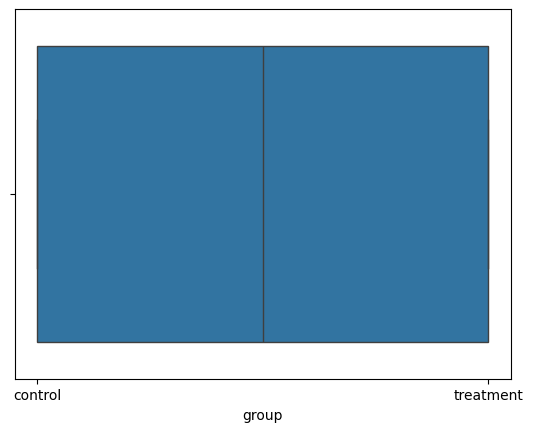

In [ ]:
# plotting group column
sns.boxplot(x='group', data=df);

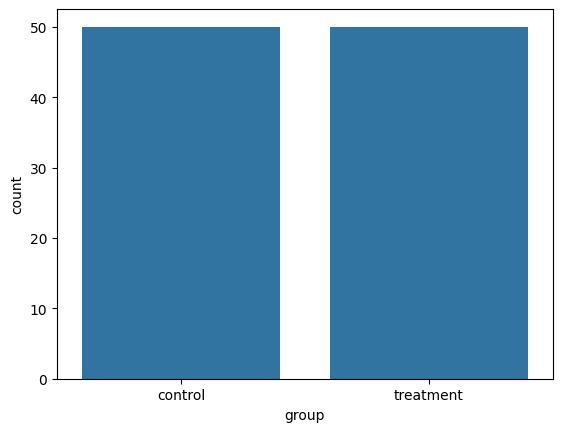

In [ ]:
# plotting group column with countplot
sns.countplot(x='group', data=df);

In [ ]:
# total number of control and treatment groups
df['group'].value_counts()

,count
group,
control,50
treatment,50


**Landing_page:**

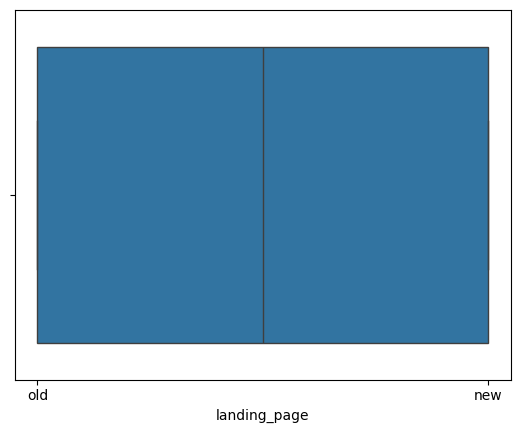

In [ ]:
# Visual analysis of landing_page
sns.boxplot(x='landing_page', data=df);

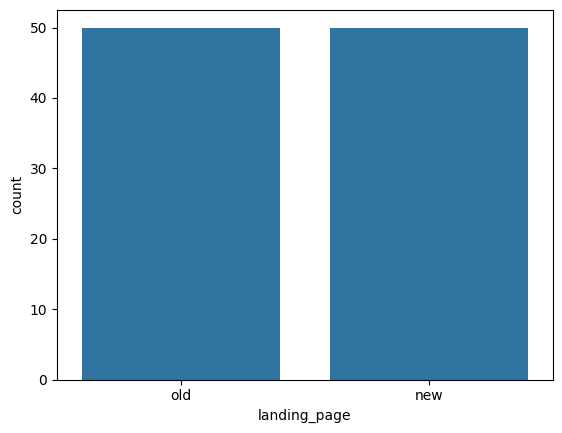

In [ ]:
# plotting landing_page with countplot
sns.countplot(x='landing_page', data=df);

In [ ]:
# total number of landing_page with hue as new and old
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


**Time_spent_on_the_page:**

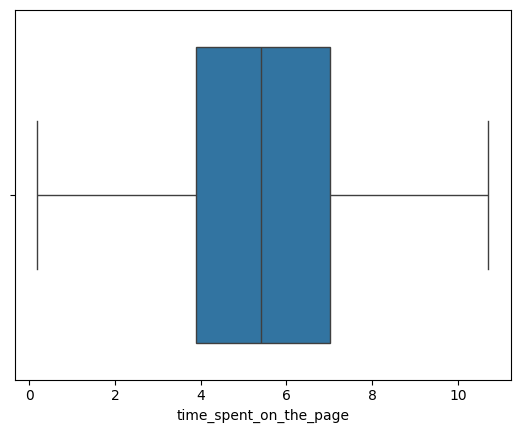

In [ ]:
# plotting time_spent_on_the_page column with boxplot
sns.boxplot(x='time_spent_on_the_page', data=df);

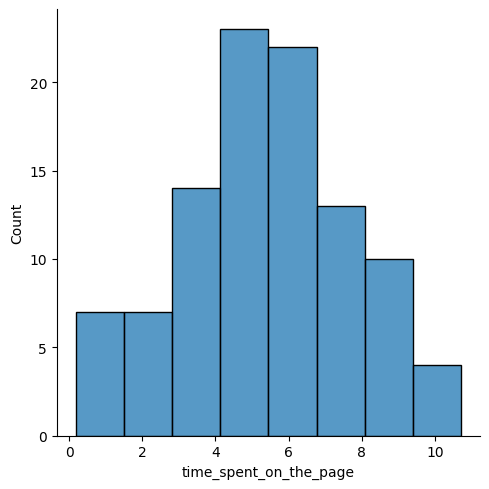

In [ ]:
# plotting column with displot
sns.displot(x='time_spent_on_the_page', data=df);

In [ ]:
# describing the column
df['time_spent_on_the_page'].describe()

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


In [ ]:
# Average of time_spent_on_the_page
df['time_spent_on_the_page'].mean()

5.377800000000001

In [ ]:
# counting the different time_spent_on_the_page
df['time_spent_on_the_page'].value_counts()

,count
time_spent_on_the_page,
6.04,2
4.75,2
7.16,2
3.88,2
5.86,2
...,...
3.52,1
5.41,1
4.28,1


**Converted:**

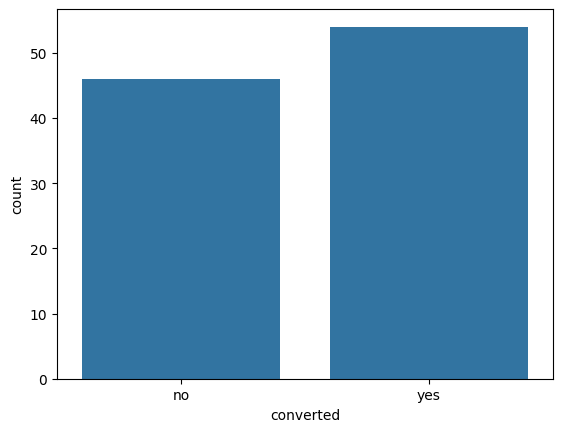

In [ ]:
# plotting the converted column with countplot
sns.countplot(x='converted', data=df);

In [ ]:
# finding total number of converted and non converted users
df['converted'].value_counts()

,count
converted,
yes,54
no,46


**Language_preferred:**

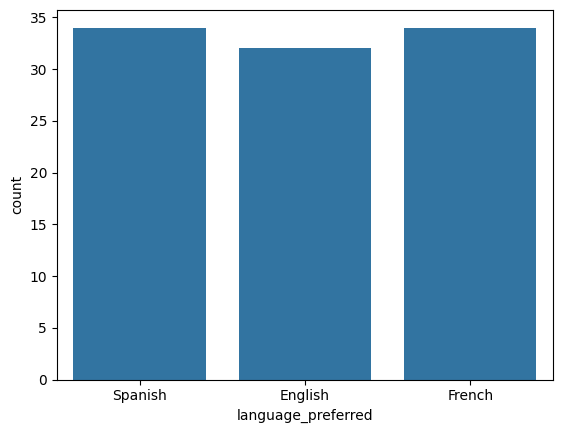

In [ ]:
# plotting the language_preferred countplot
sns.countplot(x='language_preferred', data=df);

In [ ]:
# finding the total count of users preferred language
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


### Bivariate Analysis

Group vs Time_spent_on_the_page:

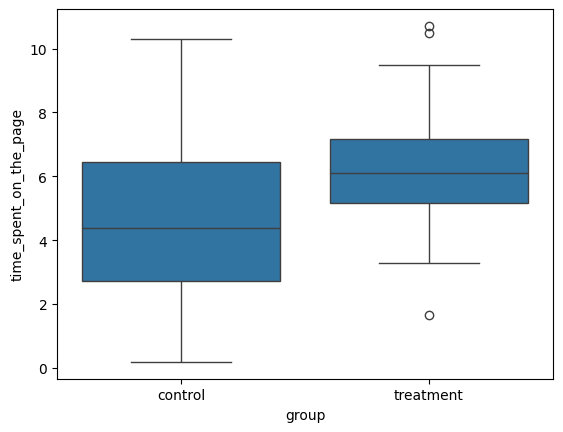

In [ ]:
# plotting bivariate analysis of group and time_spent_on_the_page column
sns.boxplot(x='group', y='time_spent_on_the_page', data=df);

Group vs conversion status:

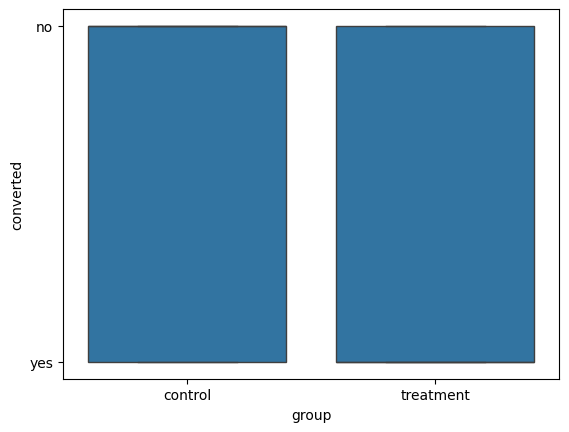

In [ ]:
# Bivariate analysis of group and converted column
sns.boxplot(x='group', y='converted', data=df);

Landing_page vs Time_spent_on_the_page:

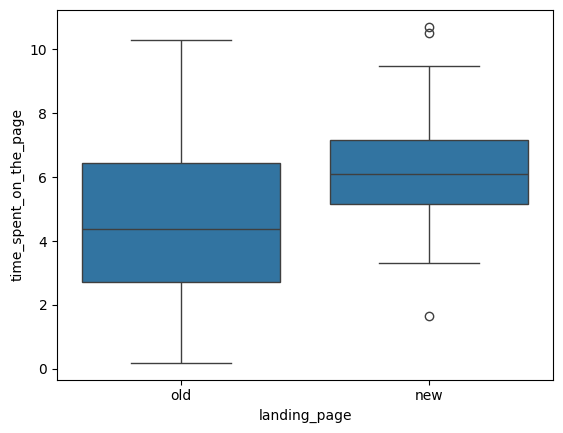

In [ ]:
# bivariate analysis of landing_page and time_spent_on_the_page column
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df);

Converted vs time_spent_on_the_page:

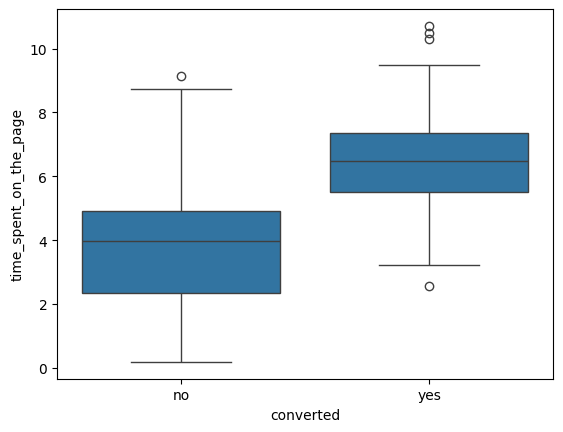

In [ ]:
# Bivariate analysis of converted and time_spent_on_the_page column
sns.boxplot(x='converted', y='time_spent_on_the_page', data=df);

In [ ]:
# finding the average time_spent by the converted and non-converted users
df.groupby('converted')['time_spent_on_the_page'].mean()

,time_spent_on_the_page
converted,
no,3.915870
yes,6.623148


Language preffered vs time_spent_on_the_page:

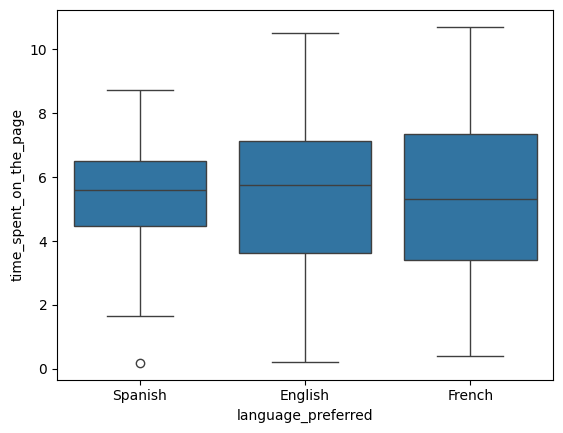

In [ ]:
# bivariate analysis of language_preferred and time_spent_on_the_page column
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=df);

In [ ]:
# finding the average time spent by the users on website as per their preferred language
df.groupby('language_preferred')['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,5.559062
French,5.253235
Spanish,5.331765


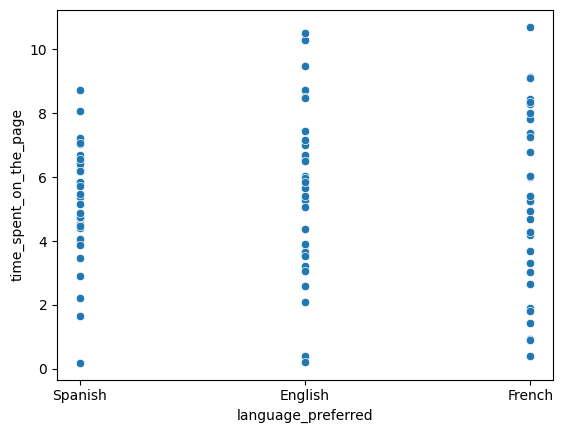

In [ ]:
# bivariate analysis of language_preferred and time_spent_on_the_page
sns.scatterplot(x='language_preferred', y='time_spent_on_the_page', data=df);

Landing page vs Conversion status:

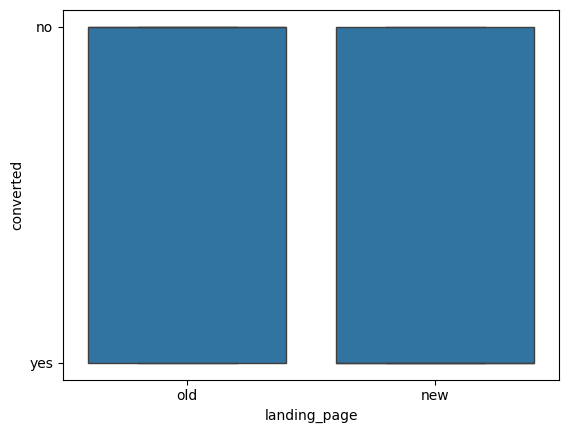

In [ ]:
# Bivaraite analysis of landing_page and comverted column
sns.boxplot(x='landing_page', y='converted', data=df);

Conversion status vs Language preferred:

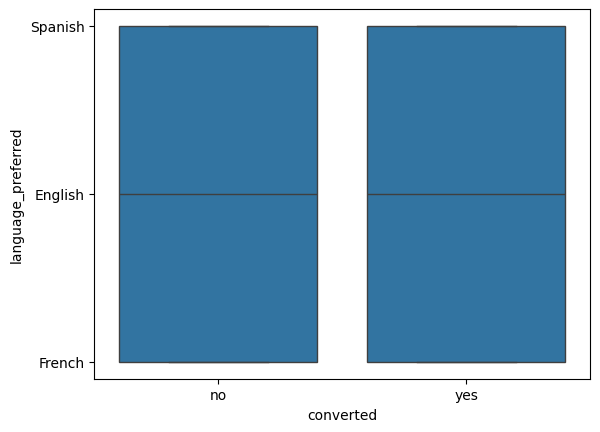

In [ ]:
# bivariate analysis of converted and language_preferred column
sns.boxplot(x='converted', y='language_preferred', data=df);

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

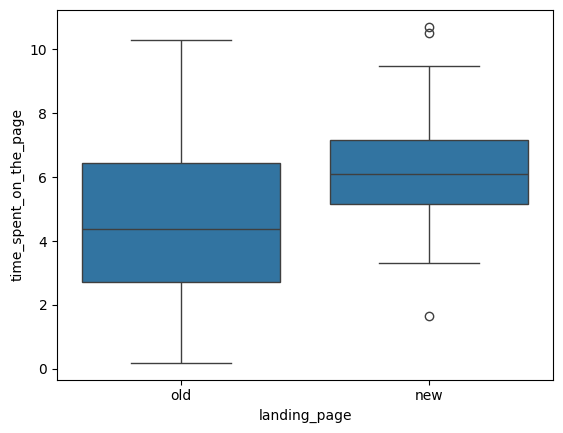

In [ ]:
# Visual analysis of landina_page and time_spent_on_the_page column
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df);

In [ ]:
# finding the average of time spent on new and old landing page
df.groupby('landing_page')['time_spent_on_the_page'].mean()

,time_spent_on_the_page
landing_page,
new,6.2232
old,4.5324


### Step 1: Define the null and alternate hypotheses

Null Hypothesis (H₀): The average time spent on both pages new vs existing page are same and has no difference.

**H₀: μ(new) = μ(existing)**

Alternative Hypothesis: The average time spent on new page is greater than existing page.

**Ha: μ(new) > μ(existing)**

### Step 2: Select Appropriate test

This test consists of comparison of 2 independent population mean and seems to be **one-tailed test** with unknown standard deviation. The test which best fits to answer this question will be **2 sample independent t test.**

### Step 3: Decide the significance level

The significance level supposed to be 0.05

**alpha = 0.05**

### Step 4: Collect and prepare data

In [ ]:
# Assigning the variables by calculating the time spent on new page as well as time spent on old page
time_spent_on_new_page = df[df['landing_page']=='new']['time_spent_on_the_page']
time_spent_on_existing_page = df[df['landing_page']=='old']['time_spent_on_the_page']
print(time_spent_on_new_page.head())
print(time_spent_on_existing_page.head())

1     7.13
2     4.40
4     4.75
6     5.25
8    10.71
Name: time_spent_on_the_page, dtype: float64
0    3.48
3    3.02
5    5.28
7    6.53
9    2.08
Name: time_spent_on_the_page, dtype: float64


### Step 5: Calculate the p-value

In [ ]:
# importing t test_ind from scipy and performing the test with unequal var and alternative set as greater
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(time_spent_on_new_page, time_spent_on_existing_page, equal_var=False, alternative='greater')
print('t_statistic', t_statistic)
print('p_value', p_value)

t_statistic 3.7867702694199856
p_value 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# comapring the p_value with alpha
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Not enough evidence to reject null hypothesis')

Reject the null hypothesis


### Step 7:  Draw inference

As the p_value is less than the set significance level, we rejected null hypothesis which states that there is enough evidence to say that time spent on new landing page is greater than time spent on existing page. Hence, new landing page is more effective for user engagement and preference.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Visual Analysis:

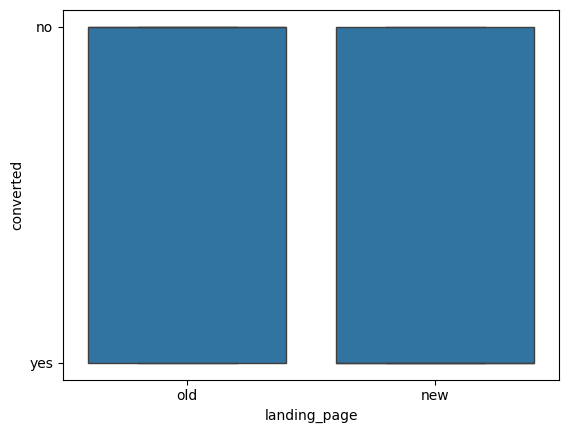

In [ ]:
# Bivariate analysis of landing_page and converted column
sns.boxplot(x='landing_page', y='converted', data=df);

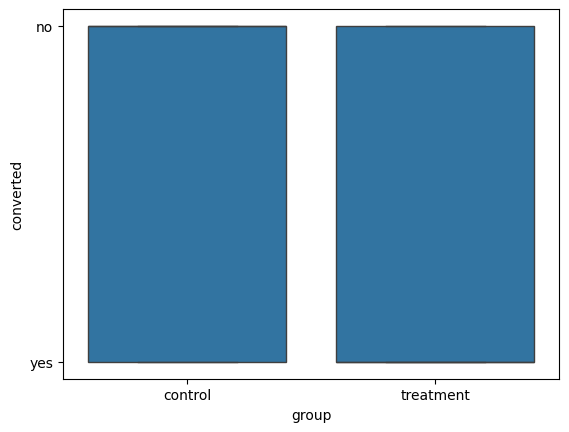

In [ ]:
# Bivariate analysis of group and converted column
sns.boxplot(x='group', y='converted', data=df);

**Define Null and Alternative Hypothesis:**

Null Hypothesis: The proportion of users who visits new landing page and get converted are equal to proportion of users who visits old landing page and get converted.

**Ho: P(new) = P(old)**

Alternative Hypothesis: The proportion of users who visits new landing page and get converted are greater than the proportion of users who visits old landing page and get converted.

**Ha: P(new) > P(old)**


**Select appropriate test:**

This question states comparison between proportion of 2 samples and seems one-tailed test so we can use **2 sample proportion Z test. **

Significance level = 0.05

**Collect and prepare data:**

In [ ]:
# Assigning the different variables such as user converted after visiting new as well as old landing page
new_user_converted = df[df['landing_page']=='new']['converted'].value_counts()['yes']
old_user_converted = df[df['landing_page']=='old']['converted'].value_counts()['yes']
# Assigning variables with total number of new and old converted users
number_of_new_user_converted = df.landing_page.value_counts()['new']
number_of_old_user_converted = df.landing_page.value_counts()['old']
print('new_user_converted:', new_user_converted)
print('old_user_converted:', old_user_converted)
print('numner_of_new_user_converted:', number_of_new_user_converted)
print('number_of_old_user_converted:', number_of_old_user_converted)

new_user_converted: 33
old_user_converted: 21
numner_of_new_user_converted: 50
number_of_old_user_converted: 50


In [ ]:
# Assigning the variable to the list of new and old user converted as well as total number of new and old user converted
conversion = [new_user_converted, old_user_converted]
number_of_users = [number_of_new_user_converted, number_of_old_user_converted]

**Calculate P_value**

In [ ]:
# performing proportions z test by importing from statsmodel.stats.proportions and setting alternative as larger
from statsmodels.stats.proportion import proportions_ztest
stat, p_value = proportions_ztest(conversion, number_of_users, alternative='larger')
print('T_statistic', stat)
print('p_value', p_value)

T_statistic 2.4077170617153842
p_value 0.008026308204056278


**Compare p_value with alpha:**

In [ ]:
# compairn pvalue with alpha
if p_value < 0.05:
  print('Reject Null Hypothesis')
else:
  print('Not enough evidence to reject null hypothesis')

Reject Null Hypothesis


**Inferences:**

As stated p_value is less than 0.05 which means we can reject null hypothesis hence, the proportion of users who visits new landing page and get converted are greater than the proportion of users who visits old landing page and get converted.

## 3. Is the conversion and preferred language are independent or related?

**Visual Analysis**

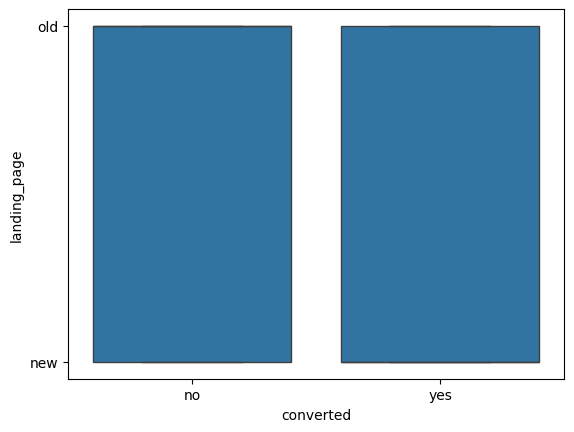

In [ ]:
# bivariate analysis of converted and landing_page column
sns.boxplot(x='converted', y='landing_page', data=df);

**Define Null and Alternative Hypothesis:**

Null hypothesis: The conversion rate and language preferred are independent of each other.

Ho: Conversion rate and preferred language are not dependant on each other

Alternative hypothesis: The conversion rate and language preferred are dependent on each other.

Ha: Conversion rate and preferred language are dependant on each other

**Select appropriate test:**

We can use **Chi-square test for independence** to prove either 2 factor are dependent or independent of each other.

**Significance level set to: 0.05**

**Collect and prepare data:**

In [ ]:
# defining contingency table with converted and language preferred
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
print('contingency_table', contingency_table)

contingency_table language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18


**Calculate p_value:**

In [ ]:
# importing chi2 contingency test from scipy and performing the test with help of contingency table
from scipy.stats import chi2_contingency
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('chi', chi)
print('p_value', p_value)
print('dof', dof)
print('expected', expected)

chi 3.0930306905370837
p_value 0.21298887487543447
dof 2
expected [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]


**Compare p_value with alpha:**

In [ ]:
# comapring p-value with alpha
if p_value < 0.05:
  print('Reject Null Hypothesis')
else:
  print('Not enough evidence to reject null hypothesis')

Not enough evidence to reject null hypothesis


**Inferences:**

As the p_value is much greater than 0.05, we do not have enough evidence to prove that conversion rate and language preferred are dependent on each other. Hence, we conclude that conversion rate and language preferred are independent of each other.

## 4. Is the time spent on the new page same for the different language users?

**Visual Analysis:**

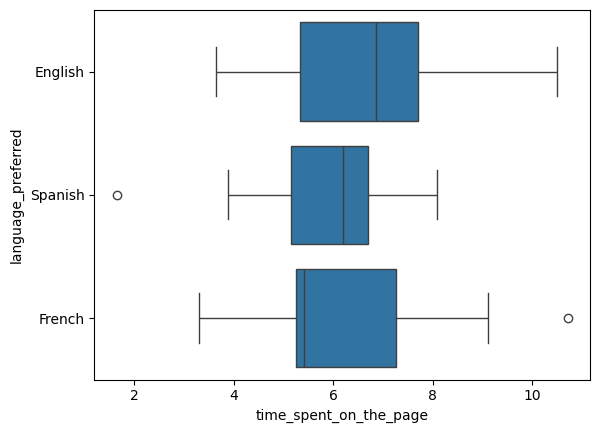

In [ ]:
# Assinging new data where landing_page is new and performing bivariate analysis of time_spent and language_preferred
df_new = df[df['landing_page']=='new']
sns.boxplot(x='time_spent_on_the_page', y='language_preferred', data=df_new);

In [ ]:
# Averaging time spent among different language preferred where landing page is new
df_new.groupby('language_preferred')['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


**Define Null and Alternative hypothesis:**

Null hypothesis: The average time spent on the new page are similar for different language preferred.

Ho: The average time spent on new page are equal for different language preferred
**bold text**
Alternative Hypothesis: At least on average time spent on new page deviate among different language preferred.

**Ha: at least one avergare time spent on new page is different among language preferred**

**Select appropriate test:**

We can use **ANOVA f-oneway test **to know if there are difference in at least one mean time spent on new page among different language preferred.

**Significance level set to 0.05**

**Collect and prepare for test:**

In [ ]:
# finding out and assigning variables of time spent with specific language preferred
time_spent_English = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']

Calculate the p_value:

In [ ]:
# performing f-oneway test by importing from scipy
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(time_spent_Spanish, time_spent_English, time_spent_French)
print('f_statistic', f_statistic)
print('p_value', p_value)

f_statistic 0.8543992770006822
p_value 0.43204138694325955


**Compare p_value with alpha:**

In [ ]:
# comparing p-value with alpha
if p_value < 0.05:
  print('Reject Null Hypothesis')
else:
  print('Not enough evidence to reject null hypothesis')

Not enough evidence to reject null hypothesis


**Inferences:**

As p_value is larger than 0.05, we do not have enough evidence to reject null hypothesis hence, average time spent on the new page are similar among different language preferred.

## Conclusion and Business Recommendations

Conclusion:

1. The ratio of users who converted is to the users not converted is higher which means the proportion of users getting converted is larger
2. By performing t test for independence, it was concluded that the average time spent on new landing page is greater than old page. Hence, customers are finding new page to be convenient.
3. By performing proportions z test, it was concluded that proportion of user who got converted after visiting new landing page are higher than those who got converted after visiting old landing page.
4. By performing Chi2 contingency test, it was concluded that conversion rate and preferred language among users are not dependent on each other.
5. By performing Anova f-oneway test, it was concluded that the average time spent on the new page is same for all 3 preferref language.

Recommendations:
1. From the above conclusion, it is highly recommended to engage users with new landing page rather than old page.
2. Company must continue to release new landing page for all preferred languages for user convenience.
3. Company must keep improvising their landing page with the help of users feedback for serving them better.
4. Company should come up with ideas to give subscription discounts to their regular customers for their loyalty.

___